In [1]:
# Python import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape, Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import time

In [2]:
# load data from google drive
from google.colab import drive 
drive.mount('/content/mnt')

Mounted at /content/mnt


In [3]:
# read csv file
train = pd.read_csv('mnt/My Drive/cau_temp/train.csv')
test = pd.read_csv('mnt/My Drive/cau_temp/test.csv')
sub = pd.read_csv('mnt/My Drive/cau_temp/submission.csv')

In [4]:
# show csv file contents
display(train,test,sub)

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,1,2,1,3,3,4,4,3,4,1,0,4,4,4,1,1,1,2,3,4,1,2,3,3,2,3,1,3,4,0,...,2,4,1,1,1,1,2,3,1,2,0,2,4,1,0,3,4,4,0,1,3,3,3,3,2,0,3,3,3,2,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,1,4,2,0,3,3,2,2,1,2,3,2,2,4,1,0,4,1,0,2,0,3,0,2,3,3,3,4,0,4,...,0,1,1,1,1,3,0,4,2,0,4,3,1,4,0,1,0,0,3,3,0,0,1,3,3,1,2,0,3,2,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,4,3,4,0,1,3,4,1,0,2,2,0,0,3,3,2,0,4,3,2,3,4,3,1,1,4,4,4,1,1,...,3,2,4,3,2,1,1,0,4,0,4,4,1,3,3,1,3,4,1,0,2,4,1,2,4,4,4,3,4,2,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,3,0,1,4,0,0,0,2,3,1,1,1,0,2,4,1,0,3,0,1,2,4,1,4,3,1,4,4,4,0,...,0,0,2,0,2,3,2,0,3,0,1,0,1,0,1,2,3,2,1,1,0,0,3,1,4,1,1,2,1,3,2,3,1,1,0,4,1,4,3,1


,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,1,0,0,2,4,3,2,0,1,3,1,1,0,2,0,4,4,2,3,0,2,2,2,2,1,3,2,2,4,1,...,1,4,4,2,1,3,4,2,3,2,4,2,3,1,1,3,2,4,3,1,2,1,3,0,4,2,2,1,1,4,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,4,3,2,3,3,2,2,0,0,0,2,4,3,0,2,0,2,4,2,3,3,1,4,2,2,3,2,2,2,0,...,1,1,0,2,1,4,4,4,0,1,2,4,4,4,1,2,4,2,1,4,1,0,1,0,4,2,0,0,3,4,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,4,4,1,0,0,1,2,1,2,2,0,3,0,4,0,2,3,3,4,1,2,0,1,2,4,3,1,3,3,1,...,1,3,3,2,1,3,0,3,2,3,2,4,2,0,4,2,2,2,1,1,0,3,0,2,1,4,3,2,3,4,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,1,2,2,3,1,2,3,4,1,3,1,0,3,3,1,2,4,3,4,1,0,0,1,1,0,4,1,3,2,2,...,0,4,0,2,4,2,1,3,2,0,1,3,0,4,1,4,2,3,3,2,2,1,4,2,0,3,0,3,2,4,2,0,0,4,3,3,3,4,4,2


,id,digit
0,2049,0
1,2050,0
2,2051,0
3,2052,0
4,2053,0
...,...,...
20475,22524,0
20476,22525,0
20477,22526,0
20478,22527,0


In [5]:
# distribution of label('digit') 
train['digit'].value_counts()

2    233
5    225
6    212
4    207
3    205
1    202
9    197
7    194
0    191
8    182
Name: digit, dtype: int64

In [6]:
# drop columns
train2 = train.drop(['id','digit','letter'],1)
test2 = test.drop(['id','letter'],1)

In [7]:
# convert pandas dataframe to numpy array
train2 = train2.values
test2 = test2.values

(2048, 784)
[[1 1 1 ... 4 3 4]
 [0 4 0 ... 2 1 2]
 [1 1 2 ... 0 2 2]
 [1 2 0 ... 0 1 1]
 [3 0 2 ... 3 1 2]]
(2048, 784)


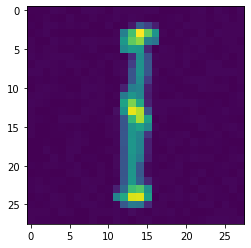

In [8]:
# show data information
plt.imshow(train2[0].reshape(28,28))
print(train2.shape)
print(train2[:5])
print(train2.shape)

In [9]:
# data normalization
train3 = train2/255.0
test3 = test2/255.0

In [10]:
# reshape
train3 = train3.reshape(-1,28,28,1)
test3 = test3.reshape(-1,28,28,1)

train_x = train3
train_y = train['digit']


In [11]:
# ImageDatagenerator & data augmentation
train_generator = ImageDataGenerator(
    height_shift_range=(-1,1),
    width_shift_range=(-1,1)
    ).flow(train_x,train_y,batch_size=64)    


In [ ]:
# real-time loss plot function

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

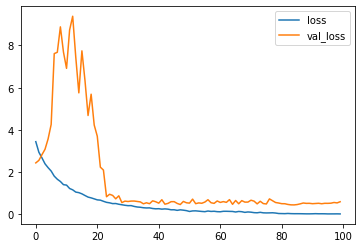

loss =  0.01834307610988617 , val_loss =  0.595059335231781
loss= 0.595059335231781
acc= 0.8878048658370972


<function matplotlib.pyplot.show>

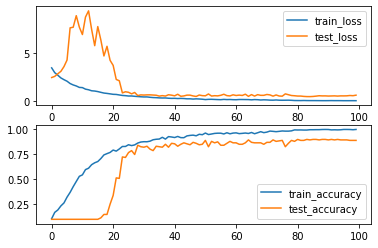

In [12]:
#modeling
model = keras.Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

#callback
model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=30, min_learning_rate=0.001)
plot_losses = PlotLosses()
callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

history = model.fit(train_x, train_y, epochs=300, verbose=1, batch_size=64, validation_split=0.1, callbacks=callbacks)

# results
print("loss=",history.history['val_loss'][-1])
print("acc=",history.history['val_accuracy'][-1])

plt.subplot(211)
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show

plt.subplot(212)
pyplot.plot(history.history['accuracy'], label='train_accuracy')
pyplot.plot(history.history['val_accuracy'], label='test_accuracy')
pyplot.legend()
pyplot.show